<a href="https://colab.research.google.com/github/erickgt00/MLMCD/blob/main/Tarea_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea en Calse

* Aplica algún método de filtro a tus datos mediante el uso de SelectKBest



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Se tratará de explicar la tasa de interes (y) a partir del monto prestado, el debito a ingresos, el total de cuentas y sus utilidades rotativas

In [ ]:
df = pd.read_csv("test.csv")
y = df[['Interest Rate']]
x = df[['Loan Amount','Term', 'Debit to Income', 'Total Accounts', 'Revolving Utilities']]

Ahora buscaremos sus clasificaciones

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
f_value = f_regression(x, y)
f_value

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([  2.49508838,  57.37532735,   0.68686413,  34.1114153 ,
        177.93825281]),
 array([1.14212905e-01, 3.70844749e-14, 4.07239902e-01, 5.26015847e-09,
        1.80030251e-40]))

In [ ]:
df_results = pd.DataFrame(f_value[0], index=x.columns)
df_results.columns = ['f_value']
df_results.sort_values('f_value', inplace = True, ascending = False)
df_results

,f_value
Revolving Utilities,177.938253
Term,57.375327
Total Accounts,34.111415
Loan Amount,2.495088
Debit to Income,0.686864


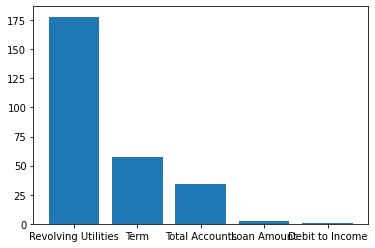

In [ ]:
plt.figure()
plt.bar(df_results.index, df_results.f_value)
plt.show()

Podemos observar que la utilidad revolvente y el plazo del crédito encabezan la realción lineal con la tasa de intéres.

# Tarea 4

* Aplica los modelos de selección de características cuidando los supuestos de cada modelo
* Busca una o varias métricas para seleccionar características en literatura relacionada con tu problema (cita tus fuentes)
* Con base en tu investigación, determina las características más relevantes de tu conjunto de datos
* Discute por qué crees que las características seleccionadas son las más relevantes y por qué el resto quedaron excluidas en la selección

Para la selección de nuestras caracteristicas es imporatante conocer primeramente bien el tema.

Para esta tarea nos enfocaremos en predecir si una persona va a ser morosa o no.
Por lo que nuestra variable de respuesta será el "Loan Status", done "0" significa que no es morosa y "1" que si es morosa.

El término "calificación de crédito" se utiliza para describir el proceso de evaluar el riesgo que un cliente presenta de incumplir una obligación financiera.

El objetivo es asignar a los clientes a uno de dos grupos: buenos y malos. Un miembro del grupo bueno se considera probable que cumpla su obligación financiera. Un miembro del grupo malo se considera probable que incumpla su obligación financiera. En su versión más simple, una tarjeta de calificación de crédito consiste en un conjunto de características que se utilizan para asignar una calificación de crédito a un cliente, indicando su nivel de riesgo. Esta calificación de crédito luego puede compararse con un umbral para tomar una decisión de préstamo. Ya que la calificación de crédito es esencialmente un problema de discriminación (bueno o malo), se puede recurrir a las numerosas técnicas de clasificación que se han sugerido en la literatura.

Dicho esto nos enfocaremos en la selección de 5 variables regresoras y 1 de respuesta.

* "Loan Amount": Es el monto del prestámo que dispuso el cliente.

* "Term": Es el plazo del prestámo.

* "Grade": Es el nivel de riesgo asignado por el banco, siendo "1" el mejor y "7" el peor.

* "Debit to Income": Este nos índica la proporción del pago mensual divido por los ingresos del cliente.

* "Delinquency": Este nos índica la cantidad de más de 30 días de morosidad del cliente en los últimos 2 años.

* "Loan Status": Esta es nuestra variable de ínteres y nos índica si el cliente es o no moroso.

Ahora bien, realizaremos la seleccón de nuestras carácteristicas.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np, plotly.express as px, matplotlib.pyplot as plt, seaborn as sns

In [2]:
df = pd.read_csv("train.csv")
y = df[['Loan Status']]
x = df[['Loan Amount','Term', 'Grade', 'Debit to Income', 'Delinquency']]

### Selección de caracteristicas por el **Anova** valor $F$

In [3]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
f_value = f_regression(x, y)
f_value

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([1.34974144, 0.784323  , 9.16882431, 0.63057909, 6.73374293]),
 array([0.24532743, 0.37582542, 0.00246266, 0.42714577, 0.00946263]))

In [4]:
df_results = pd.DataFrame(f_value[0], index=x.columns)
df_results.columns = ['f_value']
df_results.sort_values('f_value', inplace = True, ascending = False)
df_results

,f_value
Grade,9.168824
Delinquency,6.733743
Loan Amount,1.349741
Term,0.784323
Debit to Income,0.630579


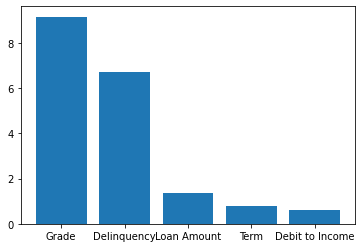

In [5]:
plt.figure()
plt.bar(df_results.index, df_results.f_value)
plt.show()

Podemos observar que con este metodo es muy importante el grado de riesgo dado por el banco y las veces que ha sido moroso los últimos 2 años.

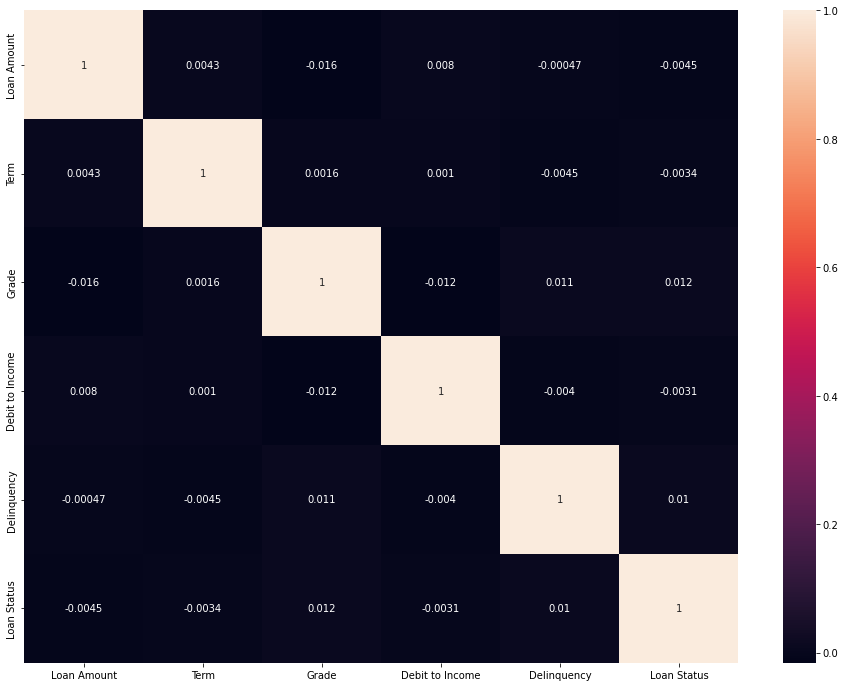

In [10]:
# Ahora vamos a revisar su correlación
ndf = df[['Loan Amount','Term', 'Grade', 'Debit to Income', 'Delinquency', 'Loan Status']]
corr = ndf.corr()
plt.figure(figsize = (16, 12))
g = sns.heatmap(ndf.corr(), annot = True)

Dada a que nuestras variables no presentan correlaciones significantes podríamos decir que nuestro modelo no presentará problemas de multicolinealidad en un futuro

### Selección de caracteristicas por el **valor $R$ de correlación**

In [11]:
from sklearn.feature_selection import r_regression

In [12]:
r_value = r_regression(x, y)
r_value

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([-0.00447296, -0.00340972,  0.01165738, -0.00305732,  0.00999034])

In [13]:
df_results['r_value'] = r_value
colors = []
for v in df_results['r_value']:
    if v > 0:
        colors.append('b')
    else:
        colors.append('r')

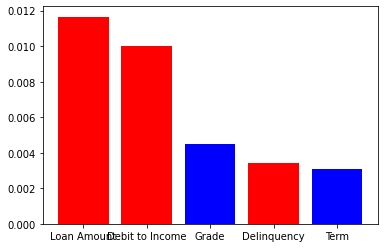

In [14]:
df_results['r_value_abs'] = df_results['r_value'].abs()
df_results.sort_values('r_value_abs', inplace = True, ascending = False)
plt.figure()
plt.bar(df_results.index, df_results.r_value_abs, color = colors)
plt.show()

Esta prueba nos índica el nivel de correlación entre si la persona es morosa y las demas variables. Siguiendo este metodo seleccionaríamos el monto del prestamo, la proporción que paga del crédito según su ingreso y el grado de riesgo.

## Conclusiones

Para la predicción del modelo tomaremos estas 5 características dado a que tiene aportación significante para el modelo. En ambas pruebas podemos ver que cumplen con los supuestos considerando diferentes factores.

## Referencias 

[Credit Scoring Using Machine Learning](https://arrow.tudublin.ie/cgi/viewcontent.cgi?article=1138&context=sciendoc): Kenneth Kennedy Technological University Dublin

[Loan Default Prediction](https://www.kaggle.com/code/lusfernandotorres/loan-default-prediction/notebook): Luis Fernando Torres (Kaggle)